Import libraries

In [1]:
import numpy
import librosa
import librosa.display
import matplotlib.pyplot as plotlib

Import the audio file avm.wav, get its instantaneous amplitudes and sample rate

In [2]:
fileName = 'avm.wav'
instAmps, sr = librosa.load(fileName, mono=True, sr=None)
print(instAmps, sr)

[ 1.5258789e-04  6.7138672e-04  4.5776367e-04 ... -5.7983398e-04
 -2.4414062e-04  9.1552734e-05] 44100


Get the audio file's frequency-domain info

In [3]:
magsAndPhases = librosa.stft(instAmps)
print(magsAndPhases)

[[-0.06676321+0.0000000e+00j -0.04701265+0.0000000e+00j
  -0.0396996 +0.0000000e+00j ... -0.03834468+0.0000000e+00j
  -0.03390747+0.0000000e+00j -0.00679688+0.0000000e+00j]
 [ 0.04281729-9.3512437e-19j  0.01627409+2.2042790e-02j
   0.02183525-1.4131955e-02j ...  0.01243507-9.3975253e-03j
   0.02838244+1.3025818e-02j -0.00213454+1.3749611e-02j]
 [-0.01111059-1.2368594e-18j -0.00916781-2.0388518e-02j
  -0.00010005+5.0883058e-02j ...  0.00535026+3.7232298e-02j
   0.0032398 -6.8845055e-03j  0.01602253-1.5817126e-02j]
 ...
 [ 0.01103191-4.7075903e-19j -0.01242788-3.9294918e-04j
   0.01424723-1.5890012e-03j ... -0.00188255+1.8726982e-02j
   0.00101913-6.2556569e-03j -0.00801278-2.9732990e-03j]
 [ 0.00219312-2.4530074e-18j  0.01362517-8.2126149e-04j
   0.00135697+9.3261531e-04j ...  0.00137673-1.1570876e-02j
  -0.00959171+5.1849210e-03j  0.00388128+3.0741261e-03j]
 [-0.01592261+0.0000000e+00j -0.01515285+0.0000000e+00j
  -0.01524171+0.0000000e+00j ...  0.00044063+0.0000000e+00j
   0.00679043+

Throw out the phase info and convert the amplitude info to dB

In [4]:
mags = numpy.abs(magsAndPhases)
magsDB = librosa.amplitude_to_db(mags, ref=numpy.max)
print(mags, magsDB)

[[0.06676321 0.04701265 0.0396996  ... 0.03834468 0.03390747 0.00679688]
 [0.04281729 0.02739946 0.02600943 ... 0.01558667 0.03122875 0.01391431]
 [0.01111059 0.02235487 0.05088316 ... 0.03761475 0.00760873 0.02251451]
 ...
 [0.01103191 0.01243409 0.01433556 ... 0.01882137 0.00633813 0.00854665]
 [0.00219312 0.0136499  0.00164655 ... 0.01165249 0.01090341 0.00495122]
 [0.01592261 0.01515285 0.01524171 ... 0.00044063 0.00679043 0.00135856]] [[-67.38569  -70.432144 -71.90071  ... -72.20233  -73.27052  -80.      ]
 [-71.24405  -75.1216   -75.57382  ... -80.       -73.985344 -80.      ]
 [-80.       -76.88899  -69.74495  ... -72.36927  -80.       -76.82719 ]
 ...
 [-80.       -80.       -80.       ... -78.38341  -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-79.83615  -80.       -80.       ... -80.       -80.       -80.      ]]


Plot log spectrogram

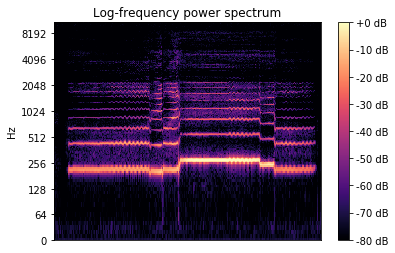

In [5]:
plotlib.title('Log-frequency power spectrum')
librosa.display.specshow(magsDB, y_axis='log')
plotlib.colorbar(format='%+2.0f dB')

Get audio file's frequency-domain info in mel form

In [6]:
melInfo = librosa.feature.melspectrogram(y=instAmps, sr=sr, n_mels=128)
print(melInfo)

[[4.35016269e-05 2.66649197e-05 6.61727725e-05 ... 3.33224545e-05
  2.29875027e-05 1.43256849e-05]
 [1.43442915e-04 1.85987410e-04 2.09117405e-04 ... 9.03221764e-05
  9.94878163e-05 8.26626245e-05]
 [2.40336498e-04 1.94075553e-04 7.60083927e-05 ... 1.65934929e-05
  1.43882673e-04 1.00009471e-04]
 ...
 [3.29558575e-06 3.17784214e-06 4.42223120e-06 ... 6.39260045e-06
  5.62557704e-06 4.47019510e-06]
 [4.42980357e-06 4.39033065e-06 4.18428014e-06 ... 8.50035748e-06
  5.66395940e-06 4.86580661e-06]
 [3.89381290e-06 4.65454746e-06 6.64258524e-06 ... 7.18254827e-06
  7.40975981e-06 5.03830028e-06]]


Convert mel info to dB

In [7]:
melDB = librosa.power_to_db(melInfo, ref=numpy.max)
print(melDB)

[[-73.13167643 -75.25732862 -71.30993811 ... -74.28936158 -75.9018135
  -77.95557749]
 [-67.94994041 -66.82189595 -66.31282961 ... -69.95878749 -69.53903244
  -70.34363953]
 [-65.70853414 -66.6370231  -70.70811593 ... -77.31735329 -67.93664645
  -69.51632013]
 ...
 [-80.         -80.         -80.         ... -80.         -80.
  -80.        ]
 [-80.         -80.         -80.         ... -80.         -80.
  -80.        ]
 [-80.         -80.         -80.         ... -80.         -80.
  -80.        ]]


Plot mel spectrogram

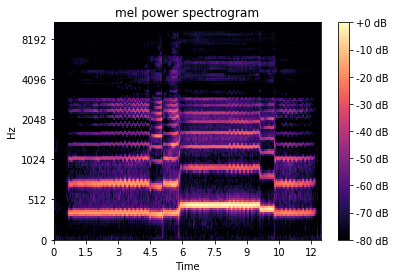

In [10]:
plotlib.title('mel power spectrogram')
librosa.display.specshow(melDB, sr=sr, x_axis='time', y_axis='mel')
plotlib.colorbar(format='%+2.0f dB')